In [107]:
## 1 https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0 
##Auctor: Shashank Kapadia -- 2019  (Testa esse aqui tbm)

## 2 https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html -- doc

##3 https://sigmoidal.ai/como-criar-uma-wordcloud-em-python/  -- WorldClouds ## 
##4 http://tirandolicoesdetudo.com.br/criando-uma-nuvem-de-palavras-wordcloud-com-dados-do-meu-cv/ -- WorldCloud ##

##5 https://www.youtube.com/watch?v=iQ1bfDMCv_c&list=PLf6b7z7NwdGVMXPEvoJu64jxtE58q4CH8&index=3&t=9s - Videos da ALICE ZHAO##
#https://github.com/adashofdata/nlp-in-python-tutorial - 2018


## 6 https://gist.github.com/alopes/5358189 - lista de StopWords em português com correspondências. 


## 7 https://medium.com/@viniljf/utilizando-processamento-de-linguagem-natural-para-criar-um-sumariza%C3%A7%C3%A3o-autom%C3%A1tica-de-textos-775cb428c84e

##8 - https://medium.com/somos-tera/como-modelar-t%C3%B3picos-atrav%C3%A9s-de-latent-dirichlet-allocation-lda-atrav%C3%A9s-da-biblioteca-gensim-1fa17357ad4b -- 2020

# 9 https://www.kdnuggets.com/2019/09/overview-topics-extraction-python-latent-dirichlet-allocation.html 


In [108]:
#python 3 and python 2 #para puxar as bibliotecas que estejam disponíveis na versões. 
from __future__ import print_function 

In [113]:
# Importing modules 
import sys
import io 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import langdetect
import tqdm
import time 
%matplotlib inline

# Gensim
import gensim, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
from gensim.models.ldamulticore import LdaMulticore


In [114]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [115]:
#Ler os dados aqui. #docs_gospels_todos_4.csv para trabalhar com uma granularidade <=4 documentos
#data = pd.read_csv('C:/Users/Klemer/Documents/TCC Klemer_codigos/datasets/docs_gospels_todos.csv', sep=';',encoding='utf-8')
data = pd.read_csv('C:/Users/Klemer Monteiro/Documents/Python Scripts/TCC Klemer_codigos/datasets/docs_gospels_todos.csv', sep=';',encoding='utf-8')
#Imprima as linhas com .head()
data.head()

,caps,text
0,Mateus 1,Registro da genealogia de Jesus Cristo filho d...
1,2,Depois que Jesus nasceu em Belém da Judéia nos...
2,3,Naqueles dias surgiu João Batista pregando no ...
3,4,Então Jesus foi levado pelo Espírito ao desert...
4,5,Vendo as multidões Jesus subiu ao monte e se a...


In [116]:
data.shape #linhas e colunas

(91, 2)

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   caps    91 non-null     object
 1   text    91 non-null     object
dtypes: object(2)
memory usage: 1.5+ KB


In [118]:
data.describe()

,caps,text
count,91,91
unique,31,91
top,16,Por aquele tempo Herodes o tetrarcaa ouviu os ...
freq,4,1


In [119]:
'''
def combined_text(docs):
    combined_text = ' '.join(docs)
    return combined_text

##Dados combinados dentro da coluna
docs = {key: [combine_text(value)] for (key,value) in docs.items}

pd.set_option('max_colwidth',150)

docs= pd.DataFrame.from_dict(data_combined).transpose()
docs.columns = ['doc']
docs = docs.sort_index()
docs 
'''

"\ndef combined_text(docs):\n    combined_text = ' '.join(docs)\n    return combined_text\n\n##Dados combinados dentro da coluna\ndocs = {key: [combine_text(value)] for (key,value) in docs.items}\n\npd.set_option('max_colwidth',150)\n\ndocs= pd.DataFrame.from_dict(data_combined).transpose()\ndocs.columns = ['doc']\ndocs = docs.sort_index()\ndocs \n"

In [120]:
#Removendo a coluna de capítulos, pois não precisamos das mesmas. 
data = data.drop('caps', axis=1) #df.drop('column_name', axis=1)
data.head()

,text
0,Registro da genealogia de Jesus Cristo filho d...
1,Depois que Jesus nasceu em Belém da Judéia nos...
2,Naqueles dias surgiu João Batista pregando no ...
3,Então Jesus foi levado pelo Espírito ao desert...
4,Vendo as multidões Jesus subiu ao monte e se a...


In [121]:
# Let's take a look at our data again
#next(iter(data_df.keys()))

In [122]:
# Notice that our dictionary is currently in key: comedian, value: list of text format
#next(iter(data_df.values()))

In [123]:
""" 
combined_text=0
def combine_text(doc):
   '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(doc)
    return combined_text

print(combined_text)
"""

" \ncombined_text=0\ndef combine_text(doc):\n   '''Takes a list of text and combines them into one large chunk of text.'''\n    combined_text = ' '.join(doc)\n    return combined_text\n\nprint(combined_text)\n"

In [124]:
# Remove punctuation tutorial 5
import re
import string 

def clean_text_docs_round1(text):
        text= text.lower()
        text= re.sub('[.*-,\/?!:;()\`´^~“”]', ' ',text)
        text= re.sub('[-|0:9]', ' ', text)
        text= re.sub('[%s]' % re.escape(string.punctuation), ' ',text)
        text= re.sub('\w*\d\w*', ' ',text)
        return text
    
round1 = lambda x: clean_text_docs_round1(x)
    
# Convert the titles to lowercase
#docs['doc'] = docs['doc'].map(lambda x: x.lower())
#docs['doc'] = docs['doc'].map(lambda x: re.sub('[,\.!?^~´`0:9]', ' ', x))
# Print out the first rows of papers
#docs['doc'].head()


In [125]:
#Atualizar documento com o texto atualizado fase 1
data_clean = pd.DataFrame(data.text.apply(round1))
data_clean.head()

,text
0,registro da genealogia de jesus cristo filho d...
1,depois que jesus nasceu em belém da judéia nos...
2,naqueles dias surgiu joão batista pregando no ...
3,então jesus foi levado pelo espírito ao desert...
4,vendo as multidões jesus subiu ao monte e se a...


In [126]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[.*‘’“”]','', text)
    text = re.sub('\r','', text)
    text= re.sub(r"^\s+|\s+$", ' ', text)
    text = re.sub('\n','', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [127]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(data_clean.text.apply(round2))
data_clean.head()

,text
0,registro da genealogia de jesus cristo filho d...
1,depois que jesus nasceu em belém da judéia nos...
2,naqueles dias surgiu joão batista pregando no ...
3,então jesus foi levado pelo espírito ao desert...
4,vendo as multidões jesus subiu ao monte e se a...


In [128]:
#remover Nulos
data_clean = data_clean.dropna().reset_index(drop=True)
data_clean['text']

0     registro da genealogia de jesus cristo filho d...
1     depois que jesus nasceu em belém da judéia nos...
2     naqueles dias surgiu joão batista pregando no ...
3     então jesus foi levado pelo espírito ao desert...
4     vendo as multidões jesus subiu ao monte e se a...
                            ...                        
86    depois de dizer isso jesus olhou para o céu e ...
87    tendo terminado de orar jesus saiu com os seus...
88    então pilatos mandou açoitar jesus    os solda...
89    no primeiro dia da semana bem cedo estando ain...
90    depois disso jesus apareceu novamente aos seus...
Name: text, Length: 91, dtype: object

In [129]:
print('Tamanho do Corpus:',len(data_clean['text']))
data_clean['text']

Tamanho do Corpus: 91


0     registro da genealogia de jesus cristo filho d...
1     depois que jesus nasceu em belém da judéia nos...
2     naqueles dias surgiu joão batista pregando no ...
3     então jesus foi levado pelo espírito ao desert...
4     vendo as multidões jesus subiu ao monte e se a...
                            ...                        
86    depois de dizer isso jesus olhou para o céu e ...
87    tendo terminado de orar jesus saiu com os seus...
88    então pilatos mandou açoitar jesus    os solda...
89    no primeiro dia da semana bem cedo estando ain...
90    depois disso jesus apareceu novamente aos seus...
Name: text, Length: 91, dtype: object

In [130]:
#Amazenar os dados em um formato pickle para ulilizado posteriormente
import pickle
data_clean.to_pickle('dados_limpos.pkl')

<h2>Cleanning</h2>

**Keeping Portuguese texts in documents**

In [131]:
from langdetect import detect
from langdetect import detect_langs
from tqdm import tqdm
from tqdm import tqdm_notebook

In [132]:
data_clean['lang'] = data_clean.text.map(detect)

In [133]:
data_clean.lang.value_counts()

pt    91
Name: lang, dtype: int64

In [134]:
data_clean = data_clean.loc[data_clean.lang=='pt']

In [135]:
#Lembrar de ver se é possivel pegar os capítulos e fazer a document_term_ matrix

In [136]:
#importando as NLTK libraries
#import nltk
#nltk.download('portuguese') #Biblioteca não está reconhecendo valores em porturguês

**Tokenization**

In [137]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Klemer
[nltk_data]     Monteiro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [138]:
data_clean['sentences'] = data_clean.text.map(sent_tokenize)
data_clean['sentences']# Print the sentences of the 1st gospel

0     [registro da genealogia de jesus cristo filho ...
1     [depois que jesus nasceu em belém da judéia no...
2     [naqueles dias surgiu joão batista pregando no...
3     [então jesus foi levado pelo espírito ao deser...
4     [vendo as multidões jesus subiu ao monte e se ...
                            ...                        
86    [depois de dizer isso jesus olhou para o céu e...
87    [tendo terminado de orar jesus saiu com os seu...
88    [então pilatos mandou açoitar jesus    os sold...
89    [no primeiro dia da semana bem cedo estando ai...
90    [depois disso jesus apareceu novamente aos seu...
Name: sentences, Length: 91, dtype: object

In [139]:
#from nltk.tokenize import word_tokenize

In [140]:
%time data_clean['tokens_sentences'] = data_clean['sentences'].map(lambda sentences: [word_tokenize(sentence) for sentence in sentences])
data_clean['tokens_sentences']

Wall time: 204 ms


0     [[registro, da, genealogia, de, jesus, cristo,...
1     [[depois, que, jesus, nasceu, em, belém, da, j...
2     [[naqueles, dias, surgiu, joão, batista, prega...
3     [[então, jesus, foi, levado, pelo, espírito, a...
4     [[vendo, as, multidões, jesus, subiu, ao, mont...
                            ...                        
86    [[depois, de, dizer, isso, jesus, olhou, para,...
87    [[tendo, terminado, de, orar, jesus, saiu, com...
88    [[então, pilatos, mandou, açoitar, jesus, os, ...
89    [[no, primeiro, dia, da, semana, bem, cedo, es...
90    [[depois, disso, jesus, apareceu, novamente, a...
Name: tokens_sentences, Length: 91, dtype: object

**Lemmatizing with POS tagging**

In [141]:
import nltk
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Klemer Monteiro\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [142]:
%time data_clean['POS_tokens'] = data_clean['tokens_sentences'].map(lambda tokens_sentences: [pos_tag(tokens) for tokens in tokens_sentences])
data_clean['POS_tokens']

Wall time: 4.28 s


0     [[(registro, NN), (da, NN), (genealogia, NN), ...
1     [[(depois, NN), (que, NN), (jesus, NN), (nasce...
2     [[(naqueles, NNS), (dias, VBP), (surgiu, JJ), ...
3     [[(então, JJ), (jesus, NN), (foi, NN), (levado...
4     [[(vendo, NN), (as, IN), (multidões, JJ), (jes...
                            ...                        
86    [[(depois, NN), (de, IN), (dizer, FW), (isso, ...
87    [[(tendo, JJ), (terminado, NN), (de, IN), (ora...
88    [[(então, NN), (pilatos, NN), (mandou, NN), (a...
89    [[(no, DT), (primeiro, NN), (dia, VBZ), (da, J...
90    [[(depois, NN), (disso, NN), (jesus, NN), (apa...
Name: POS_tokens, Length: 91, dtype: object

In [143]:
# Inspired from https://stackoverflow.com/a/15590384
nltk.download('wordnet')
from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return ''

from nltk.stem.wordnet import WordNetLemmatizer
%time lemmatizer = WordNetLemmatizer()

Wall time: 0 ns


[nltk_data] Downloading package wordnet to C:\Users\Klemer
[nltk_data]     Monteiro\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [144]:
# Lemmatizing each word with its POS tag, in each sentence
data_clean['tokens_sentences_lemmatized'] = data_clean['POS_tokens'].map(
    lambda list_tokens_POS: [
        [
            lemmatizer.lemmatize(el[0], get_wordnet_pos(el[1])) 
            if get_wordnet_pos(el[1]) != '' else el[0] for el in tokens_POS
        ] 
        for tokens_POS in list_tokens_POS
    ]
)

In [145]:
%time data_clean['tokens_sentences_lemmatized']

Wall time: 0 ns


0     [[registro, da, genealogia, de, jesus, cristo,...
1     [[depois, que, jesus, nasceu, em, belém, da, j...
2     [[naqueles, dias, surgiu, joão, batista, prega...
3     [[então, jesus, foi, levado, pelo, espírito, a...
4     [[vendo, as, multidões, jesus, subiu, ao, mont...
                            ...                        
86    [[depois, de, dizer, isso, jesus, olhou, para,...
87    [[tendo, terminado, de, orar, jesus, saiu, com...
88    [[então, pilatos, mandou, açoitar, jesus, os, ...
89    [[no, primeiro, dia, da, semana, bem, cedo, es...
90    [[depois, disso, jesus, apareceu, novamente, a...
Name: tokens_sentences_lemmatized, Length: 91, dtype: object

<h2>Stopwords</h2>

**Regrouping tokens and removing stop words**

In [146]:
# coding: utf8
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from string import punctuation
#nltk.download('portuguese')
from __future__ import unicode_literals

stopwords_verbs = ['say', 'get', 'go', 'know', 'may', 'need', 'like', 'make', 'see', 'want', 'come', 'take', 'use', 'would', 'can']


stopwords_other = (
"""
a
acerca
adeus
agora
ainda
alem
algmas
algo
algumas
alguns
alguém
ali
além
ambas
ambos
ano
anos
antes
ao
aonde
aos
apenas
apoio
apontar
apos
após
aquela
aquelas
aquele
aqueles
aqui
aquilo
as
assim
através
atrás
até
aí
aís
baixo
baixos
bastante
bastantes
bem
boa
boas
bom
bons
breve
cair
caiu
cairam
cairão
cada
caminho
catorze
cedo
cento
certamente
certeza
cima
cinco
coisa
coisas
com
como
comprido
conhecido
conselho
contra
contudo
corrente
cuja
cujas
cujo
cujos
custa
cá
da
daquela
daquelas
daquele
daqueles
dar
das
dás
de
debaixo
dela
delas
dele
deles
demais
dentro
depois
desde
desligado
dessa
dessas
desse
desses
desta
destas
deste
destes
deve
devem
deverá
dez
dezanove
dezasseis
dezassete
dezoito
dia
diante
direita
dispoe
dispoem
diversa
diversas
diversos
diz
dizem
dizer
disse
disseram
dizendo
do
doi
dois
dos
doze
duas
durante
dá
dão
dúvida
dito
diria
duvidar
duvide
dúvidas
e
ela
elas
ele
eles
em
embora
enquanto
entao
entre
então
era
eram
essa
essas
esse
esses
esta
estado
estamos
estar
estará
estas
estava
estavam
este
esteja
estejam
estejamos
estes
esteve
estive
estivemos
estiver
estivera
estiveram
estiverem
estivermos
estivesse
estivessem
estiveste
estivestes
estivéramos
estivéssemos
estou
está
estás
estávamos
estão
eu
exemplo
clamar
clamaram
falar 
falaram
falta
fará
favor
faz
fazeis
fazer
façam
faria
fizeram
façam
fazem
fazemos
fazer
fazes
fazia
faço
fez
fim
final
foi
fomos
for
fora
foram
forem
forma
formos
fosse
fossem
foste
fostes
fui
fôramos
fôssemos
geral
gerar
gerou
grande
grandes
grupo
ha
há
haja
hajam
hajamos
havemos
haver
haveria
haverá
havia
hei
hoje
hora
horas
houve
houvemos
houver
houvera
houveram
houverei
houverem
houveremos
houveria
houveriam
houvermos
houverá
houverão
houveríamos
houvesse
houvessem
houvéramos
houvéssemos
há
hão
iniciar
inicio
ir
irá
isso
ista
iste
isto
já
lado
lados
lhe
lhes
ligado
local
localizar
logo
longe
lugar
lá
lo
lar
lisar
maior
maiores
maioria
maiorias
mais
mal
maldar
mas
me
mediante
meio
menor
menos
meses
mesma
mesmas
mesmo
mesmos
meu
meus
mil
minha
minhas
momento
muito
muitos
máximo
mês
mim
mas
mais
morreu
morrer
na
nada
nao
naquela
naquelas
naquele
naqueles
nas
nem
nenhuma
nessa
nessas
nesse
nesses
nesta
nestas
neste
nestes
nele
no
noite
nome
nos
nossa
nossas
nosso
nossos
nova
novas
nove
novo
novos
num
numa
numas
nunca
nuns
não
nível
nós
número
o
obra
obrigada
obrigado
oitava
oitavo
oito
onde
ontem
onze
os
ou
outra
outras
outro
outros
ouviram 
ouvir
ouviria
ouviu
ouvistes
para
parece
parte
partir
paucas
pegar
pela
pelas
pelo
pelos
perante
perto
pessoas
pode
podem
poder
poderá
podia
pois
ponto
pontos
por
pôr
porque
porquê
portanto
posição
possivelmente
posso
possível
pouca
pouco
poucos
povo
primeira
primeiras
primeiro
primeiros
promeiro
propios
proprio
própria
próprias
próprio
próprios
próxima
próximas
próximo
próximos
puderam
pôde
põe
põem
quais
qual
qualquer
quando
quanto
quarta
quarto
quatro
que
quem
quer
quereis
querem
queremas
queres
quero
questão
quieto
quinta
quinto
quinze
quáis
quê
relação
relacionar 
respondeu
responder 
respostas
responderam
sabe
sabem
saber
se
segunda
segundo
sei
seis
seja
sejam
sejamos
sem
sempre
sendo
ser
serei
seguir
seguiriam
seguiram
seremos
seria
seriam
será
serão
seríamos
sete
seu
seus
sexta
sexto
sim
sistema
sob
sobre
sois
somente
somos
sou
sua
suas
são
sétima
sétimo
só
sair
sairam
saiu
tal
talvez
tambem
também
tanta
tantas
tanto
tarde
te
tem
têm
temos
tempo
tendes
tenha
tenham
tenhamos
tenho
tens
tentar
tentaram
tente
tentei
tentado
tentar
ter
terceira
terceiro
terei
teremos
teria
teriam
terá
terão
teríamos
teu
teus
teve
terminar
terminaram
terminariam
tinha
tinham
tipo
tive
tivemos
tiver
tivera
tiveram
tiverem
tivermos
tivesse
tivessem
tiveste
tivestes
tivéramos
tivéssemos
toda
todas
todo
todos
trabalhar
trabalho
treze
três
tu
tua
tuas
tudo
tão
tém
têm
tínhamos
um
uma
umas
uns
usa
usar
vai
va
vá
vão
vais
valor
veja
vem
vens
ver
viram
veriam
verão
viu
verdade
verdadeiro
vez
vezes
viagem
vindo
vinte
você
vocês
vos
vossa
vossas
vosso
vossos
vários
vão
vêm
vós
zero
à
às
área
é
éramos
és
último
últimos
pois
poi
por 
ninguém 
digo 
coisa
perguntou
perguntariam
perguntaram
perguntar
acumular 
acumulou
acumularam
furtar 
furtou
enviou
enviar
si
deu
dar
igualar 
suportar
suportaram
suportariam
ficou
ficaram
aproximar
aproximou
aproximaram 
saindo
sairam
saiu
causa
sido
ante
começou 
imediatamente
vendo
tendo 
deram
”
“
mt
mc
jc
lc
lo
at
la
disso
daquilo
olhar
olhou
olharam
olhariam
""".split())

#stopwords = set(stopwords.words('portuguese') + list(punctuation))
%time my_stopwords = (stopwords.words('Portuguese') +list(punctuation)+ stopwords_verbs + stopwords_other)
#%time my_stopwords = stopwords + stopwords_other


Wall time: 15 ms


[nltk_data] Downloading package punkt to C:\Users\Klemer
[nltk_data]     Monteiro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Klemer
[nltk_data]     Monteiro\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [147]:
""" 
## Stemming
import nltk
nltk.download('punkt')
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer

ps = PorterStemmer()
stemmer = SnowballStemmer('Portuguese')

#data_clean['tokens_sentences_lemmatized']


# Create the Pandas dataFrame.
#data_clean = pd.DataFrame(data_clean, columns = ['tokens_setences_stemmed'])

# Split the sentences to lists of words.
#data_clean['tokens_setences_lemmatized'] = data_clean['tokens_setences_lemmatized'].str.split()
%time data_clean['tokens_sentences_stemmed'] = data_clean['tokens_sentences_lemmatized'].apply(lambda x: [ps.stem(tokens) for tokens in x]) # Stem every word.
print(data_clean['tokens_sentences_stemmed'])

#w = data_clean['tokens_sentences_lemmatized']

#tokens_sentences_stemmed= []
#for i in w:
    #w = data_clean['tokens_stemmed'].map(lambda tokens_stemmed: [ps(w) for tokens in w])
     #print(w ,":",data_clean['tokens_stemmed']= tokens_sentences_stemmed.append(ps.stem(w)) 
  
"""


' \n## Stemming\nimport nltk\nnltk.download(\'punkt\')\nfrom nltk.stem import PorterStemmer\nfrom nltk.tokenize import sent_tokenize, word_tokenize\nfrom nltk.stem.snowball import SnowballStemmer\n\nps = PorterStemmer()\nstemmer = SnowballStemmer(\'Portuguese\')\n\n#data_clean[\'tokens_sentences_lemmatized\']\n\n\n# Create the Pandas dataFrame.\n#data_clean = pd.DataFrame(data_clean, columns = [\'tokens_setences_stemmed\'])\n\n# Split the sentences to lists of words.\n#data_clean[\'tokens_setences_lemmatized\'] = data_clean[\'tokens_setences_lemmatized\'].str.split()\n%time data_clean[\'tokens_sentences_stemmed\'] = data_clean[\'tokens_sentences_lemmatized\'].apply(lambda x: [ps.stem(tokens) for tokens in x]) # Stem every word.\nprint(data_clean[\'tokens_sentences_stemmed\'])\n\n#w = data_clean[\'tokens_sentences_lemmatized\']\n\n#tokens_sentences_stemmed= []\n#for i in w:\n    #w = data_clean[\'tokens_stemmed\'].map(lambda tokens_stemmed: [ps(w) for tokens in w])\n     #print(w ,":",d

In [148]:
from itertools import chain # to flatten list of sentences of tokens into list of tokens

In [149]:
data_clean['tokens'] = data_clean['tokens_sentences_lemmatized'].map(lambda sentences: list(chain.from_iterable(sentences)))
data_clean['tokens'] = data_clean['tokens'].map(lambda tokens: [token.lower() for token in tokens if token.isalpha() 
                                                    and token.lower() not in my_stopwords and len(token)>2])

In [150]:
%time data_clean['tokens']

Wall time: 0 ns


0     [registro, genealogia, jesus, cristo, filho, d...
1     [jesus, nasceu, belém, judéia, dias, rei, hero...
2     [dias, surgiu, joão, batista, pregando, desert...
3     [jesus, levado, espírito, deserto, diabo, jeju...
4     [multidões, jesus, subiu, monte, assentou, dis...
                            ...                        
86    [jesus, céu, orou, pai, chegou, glorifica, fil...
87    [terminado, orar, jesus, discípulos, atravesso...
88    [pilatos, mandou, açoitar, jesus, soldados, te...
89    [semana, estando, escuro, maria, madalena, che...
90    [jesus, apareceu, novamente, discípulos, marge...
Name: tokens, Length: 91, dtype: object

In [151]:
""" 
nlp = spacy.load("pt_core_news_sm")

stopwords= STOP_WORDS

texts = data_clean['texts'].tolist()
doc = list(nlp.pipe(texts))

nlp = spacy.load("pt", disable=['parser', 'tagger', 'ner'])
stops = stopwords.words("portuguese")

def normalize(comment, lowercase, remove_stopwords):
    if lowercase:
        comment = comment.lower()
    comment = nlp(comment)
    lemmatized = list()
    for word in comment:
        lemma = word.lemma_.strip()
        if lemma:
            if not remove_stopwords or (remove_stopwords and lemma not in stops):
                lemmatized.append(lemma)
    return " ".join(lemmatized)


data_df['text_after_clean'] = data_clean['texts'].apply(normalize, lowercase=True, remove_stopwords=True)
"""

' \nnlp = spacy.load("pt_core_news_sm")\n\nstopwords= STOP_WORDS\n\ntexts = data_clean[\'texts\'].tolist()\ndoc = list(nlp.pipe(texts))\n\nnlp = spacy.load("pt", disable=[\'parser\', \'tagger\', \'ner\'])\nstops = stopwords.words("portuguese")\n\ndef normalize(comment, lowercase, remove_stopwords):\n    if lowercase:\n        comment = comment.lower()\n    comment = nlp(comment)\n    lemmatized = list()\n    for word in comment:\n        lemma = word.lemma_.strip()\n        if lemma:\n            if not remove_stopwords or (remove_stopwords and lemma not in stops):\n                lemmatized.append(lemma)\n    return " ".join(lemmatized)\n\n\ndata_df[\'text_after_clean\'] = data_clean[\'texts\'].apply(normalize, lowercase=True, remove_stopwords=True)\n'

**Frequência dos Tokens**

In [152]:
import nltk
from nltk import word_tokenize
from nltk.probability import FreqDist
from collections import Counter
import itertools

''' 
tokens_freq = data_clean['tokens']
#print(tokens_freq)
#tokens= data_clean['tokens'].dropna(inplace=True)

#tokens = 0

#tokens = tokens_freq.apply(word_tokenize)
fdist = nltk.FreqDist(tokens_freq)
for words in fdist:
    fdist[words.lower()]+= 1
    print(words,fdist[words])


#w= []
#w = data_clean['tokens'].head(3).tolist()[0][:300000]
#fdist = nltk.FreqDist(w)
#print(len(fdist))

#from pprint import pprint

#for words in list(fdist.keys())[0][:300000]:
     #print(str(i)',',words+": "+ fdist[words][:30] % len(fdist))
#        print(words, fdist[20])



#freq = data_clean.tokens.str.split().apply(lambda x: Counter(x))
#pprint(freq)

#print('Palavra que mais aparece é: ',fdist.max(), fdist[words])
'''
''' 
import nltk
import itertools
from nltk.probability import FreqDist
texts = data_clean['text']
texts = [nltk.word_tokenize(text) for text in texts ]
# collapse into a single list
tokens_fd = list(itertools.chain(*texts))

FD =FreqDist(tokens_fd)
FD
'''

freqs= data_clean['tokens'].head(91).tolist()[0][:200000] #this is my
fdist = FreqDist()
for word in word_tokenize(freqs):
        fdist[word.lower()] += 1
        print(fdist[word])



#def most_common_words_list (x):
    #word_count_tups = nltk.FreqDist(x['tokens']).most_common(x)
   # return [word for word, count in word_count_tups]


#data_clean ['freq30'] = data_clean.tokens.apply(lambda x: nltk.FreqDist(x['tokens']).most_common(30),  result_type='reduce', axis=1)
#data_clean['freq30'].tolist()

TypeError: expected string or bytes-like object

In [153]:
%time
#words = set()

#words= data_clean['tokens'].head(4).tolist()[0][:300000]

#print(len(words))
#print(words[:100])

Wall time: 0 ns


<h2>Bag of Words</h2>

**Bag-of-words model(BoW ) is the simplest way of extracting features from the text. BoW converts text into the matrix of occurrence of words within a document. This model concerns about whether given words occurred or not in the document.**

In [154]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer


#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True, stop_words= my_stopwords ,ngram_range = (1,1), tokenizer = token.tokenize)


from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()

#Press Bag_of_Words and TF-IDF matrix of terms
text_counts= cv.fit_transform(data_clean['tokens'])

text_tf= tf.fit_transform(data_clean['tokens'])


print(text_counts)

print(text_tf)


C:\Users\Klemer Monteiro\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['al', 'algu', 'am', 'amos', 'ap', 'atr', 'atrav', 'c', 'd', 'dever', 'ent', 'est', 'estiv', 'f', 'fa', 'far', 'h', 'houv', 'is', 'j', 'l', 'ltimo', 'ltimos', 'm', 'mero', 'n', 'nhamos', 'ningu', 'p', 'porqu', 'posi', 'poss', 'pr', 'pria', 'prias', 'prio', 'prios', 'qu', 'quest', 'r', 'ramos', 'rea', 'rela', 'rios', 's', 'ssemos', 't', 'tamb', 'tima', 'timo', 'tiv', 'tr', 'v', 'vamos', 'vel', 'vida', 'vidas', 'voc', 'xima', 'ximas', 'ximo', 'ximos'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


AttributeError: 'list' object has no attribute 'lower'

<h1>LDA</h1>

<h2>Data Preparation</h2>

**Prepare text for LDA Analysis**

C:\Users\Klemer Monteiro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


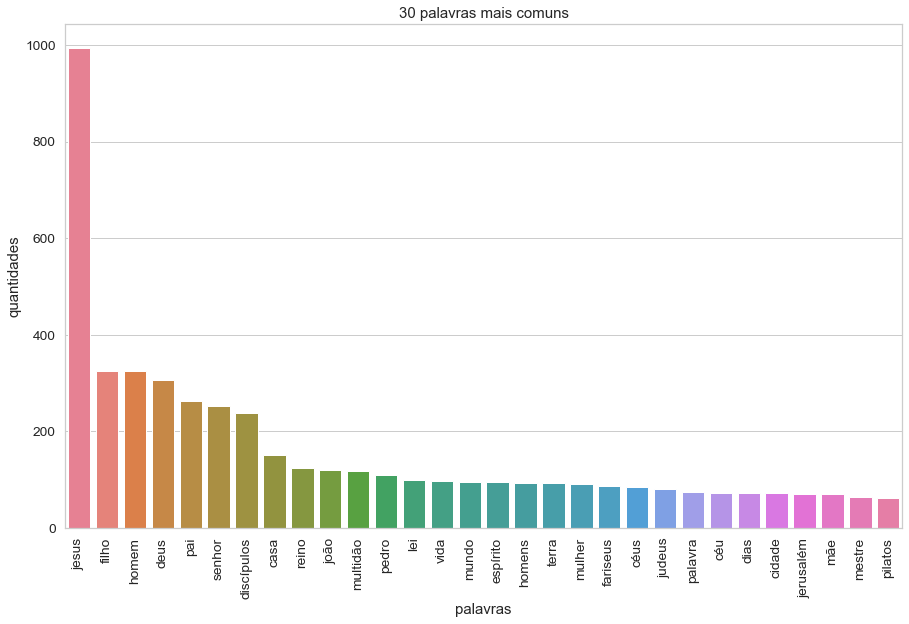

<Figure size 432x288 with 0 Axes>

In [155]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


# Helper function
def plot_30_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:30]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='30 palavras mais comuns')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('palavras')
    plt.ylabel('quantidades')
    plt.show()
    plt.savefig('30_palavras_mais_comuns_evangelhos.png', format='png')


#Adicionando novas Stop-Words
count_vectorizer= CountVectorizer(stop_words = my_stopwords,lowercase=True)

#Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(data_clean['text'])

# Visualize the 30 most common words
plot_30_most_common_words(count_data, count_vectorizer) 


**Prepare bi-grams and tri-grams**


In [157]:
# Gensim
#import gensim, spacy, logging, warnings
import gensim
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.ldamodel import LdaModel
from gensim import corpora, models, similarities, downloader



from gensim.corpora.dictionary import Dictionary
from gensim.test.utils import get_tmpfile

from gensim import models
from gensim.models import Phrases



In [158]:
tokens = data_clean['tokens']
bigram_model = Phrases(tokens)
trigram_model = Phrases(bigram_model[tokens], min_count=3)
tokens = list(trigram_model[bigram_model[tokens]])

#tokens = pd.Series([tokens]).tolist()

#print(tokens[0][:200000])

In [159]:
#https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html#sphx-glr-auto-examples-tutorials-run-lda-py
#https://rare-technologies.com/what-is-topic-coherence/
#Add bigrams and trigrams to docs (only ones that appear 30 times or more).
#bigram = Phrases(data_clean['text'].head(4).tolist(), min_count=30)
#for idx in range(len(words)):
#    for token_i in bigram[w[idx]]:
#        if '_' in token_i:
             #Token is a bigram, add to document.
#                words[idx].append(token_i)



**Prepare objects for LDA gensim implementation**

In [161]:


#words = [t.split() for t in tokens]


#dictionary_LDA = corpora.Dictionary(words_filtered)

#filter_extremes(no_below=5, no_above=0.5, keep_n=100000, keep_tokens=None)
#no_below (int, optional) – Keep tokens which are contained in at least no_below documents.
#no_above (float, optional) – Keep tokens which are contained in no more than no_above documents (fraction of total corpus size, not an absolute. number).
#keep_n (int, optional) – Keep only the first keep_n most frequent tokens.
#keep_tokens (iterable of str) – Iterable of tokens that must stay in dictionary after filtering.

# Create a dictionary representation of the documents.

# Filter out words that occur less than N documents, or more than 90% of the documents.
dictionary_LDA = corpora.Dictionary(tokens)
#dictionary_LDA.filter_extremes(no_below=1,no_above=1.0,keep_n=200000) #no_above= 0.9 

# Bag-of-words representation of the documents.
corpus = [dictionary_LDA.doc2bow(text) for text in tokens]

#dct = Dictionary(corpus)
#dct.save_as_text(tmp_fname)

#print(corpus) 
#print('\n')

In [162]:
print('Number of unique tokens: %d' % len(dictionary_LDA))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 5662
Number of documents: 91


<h1>Running LDA</h1>      
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
       
  

In [163]:
from gensim import models
import numpy as np

In [164]:
#Number of Topics and After will choose the number of Words to each topics

#Model 1
#the [distribution of the] number of words per topic is handled by eta
#the [distribution of the] number of topics per document is handled by alpha
# Train LDA model.
import time
from gensim.models import LdaModel

#Set training parameters.
num_topics = 30
chunksize = 91                           #Dependend of model chunksize growth the aceleration of modeling
passes = 10                              #epochs
iterations = 4                          #iterations between topics and docs
minimum_probability= 0.4
minimum_phi_value= 0.4
#per_word_topics = True
decay = 0.5         #
eval_every = 1  # Don't evaluate model perplexity, takes too much time.


%time
np.random.seed(123456)         # Make a index to word dictionary.
temp = dictionary_LDA[0]  # This is only to "load" the dictionary.
id2word = dictionary_LDA.id2token
lda_model= models.LdaModel(corpus=corpus, \
                id2word=id2word, \
                alpha=[0.01]*num_topics, \
                eta=[0.001]*(len(dictionary_LDA)), \
                #iterations=iterations, \
                num_topics=num_topics, \
                decay = decay, \
                passes=passes, \
                minimum_probability= minimum_probability, \
                minimum_phi_value= minimum_phi_value, \
                #per_word_topics =  per_word_topics, \
                eval_every=eval_every)


Wall time: 0 ns


In [165]:
#Model 2
#the [distribution of the] number of words per topic is handled by eta
#the [distribution of the] number of topics per document is handled by alpha

import time
from gensim.models import LdaModel


#Set training parameters.
num_topics = 10
chunksize = 91                          #Dependend of model chunksize growth the aceleration of modeling
passes = 10                              #epochs
#iterations = 4                          #iterations between topics and docs
minimum_probability= 0.4
minimum_phi_value= 0.4
per_word_topics = True
decay = 0.5         #
eval_every = None  # Don't evaluate model perplexity, takes too much time.

np.random.seed(123456)
%time lda_model_2 = LdaModel(corpus, num_topics=num_topics, \
                          id2word=dictionary_LDA, \
                          passes=passes, \
                          alpha=0.9, \
                          eta=0.4, \
                          decay = decay, \
                          minimum_probability= minimum_probability, \
                          minimum_phi_value= minimum_phi_value, \
                          per_word_topics=per_word_topics, \
                          eval_every=eval_every) 


Wall time: 651 ms


In [166]:
# Computar a perplexidade do modelo (quanto menor, melhor)
print('\nPerplexidade: ', lda_model.log_perplexity(corpus))

# Computar a perplexidade do modelo (quanto menor, melhor)
print('\nPerplexidade 2: ', lda_model_2.log_perplexity(corpus))


Perplexidade:  -10.493082377385582

Perplexidade 2:  -8.060879103343353


In [167]:
# Computar o Score de Coerência
import time

coherence_model_lda = CoherenceModel(model=lda_model, texts=tokens, dictionary=dictionary_LDA, coherence='c_v')
%time coherence_lda = coherence_model_lda.get_coherence()
print('\nScore de Coerência: ', coherence_lda)
 
coherence_model_lda_2 = CoherenceModel(model=lda_model_2, texts=tokens, dictionary=dictionary_LDA, coherence='c_v')
%time coherence_lda = coherence_model_lda.get_coherence()
print('\nScore de Coerência 2: ', coherence_lda)


Wall time: 13.5 s

Score de Coerência:  0.3514366221765891
Wall time: 1.06 s

Score de Coerência 2:  0.3514366221765891


<h1>Visualization of Topics with pyLDAvis</h1>

In [168]:
#The vizualizations will helps to chosse the best topics to chosse to anysi the model
#This Step is optional
%matplotlib inline
import pyLDAvis
import pyLDAvis.gensim
%time vis = pyLDAvis.gensim.prepare(topic_model=lda_model_2, corpus=corpus, dictionary=dictionary_LDA)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

Wall time: 3.95 s


<h1>Quick exploration of LDA results</h1>

**Looking at topics**

In [169]:
top_topics = lda_model.top_topics(corpus) #, num_words=25)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
#avg_topic_coherence = sum([t[1] for t in top_topics]) /num_topics
#print('Average topic coherence: %.4f.' % avg_topic_coherence)

from pprint import pprint
#pprint(top_topics)

for i,top_topics in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=30):
    pprint(str(i)+": "+ top_topics)
    print()

('8: 0.063*"jesus" + 0.053*"pai" + 0.026*"senhor" + 0.020*"ama" + 0.018*"joão" '
 '+ 0.015*"discípulos" + 0.014*"simão_pedro" + 0.013*"mundo" + 0.013*"filho" + '
 '0.011*"pedro" + 0.011*"vou" + 0.010*"creiam" + 0.010*"discípulo" + '
 '0.010*"peixes" + 0.009*"simão" + 0.009*"rede" + 0.009*"sabes" + 0.008*"iria" '
 '+ 0.007*"conhece" + 0.007*"amo" + 0.007*"vir" + 0.007*"palavras" + '
 '0.006*"obras" + 0.006*"praia" + 0.006*"profeta" + 0.006*"joão_batista" + '
 '0.006*"deus" + 0.006*"vivo" + 0.006*"nenhum" + 0.006*"ouvindo"')

('22: 0.025*"jesus" + 0.016*"pai" + 0.014*"deus" + 0.012*"filho" + '
 '0.011*"senhor" + 0.010*"irmão" + 0.010*"joão" + 0.009*"servo" + '
 '0.007*"homens" + 0.006*"homem" + 0.006*"vida" + 0.006*"filhos" + '
 '0.006*"digno" + 0.005*"casa" + 0.005*"chamado" + 0.005*"luz" + 0.005*"céu" + '
 '0.005*"mundo" + 0.005*"água" + 0.005*"filipe" + 0.005*"cidade" + '
 '0.004*"colocou" + 0.004*"natanael" + 0.004*"graça" + 0.004*"discípulos" + '
 '0.004*"encontrou" + 0.004*"recebe"

In [170]:
top_topics_2 = lda_model_2.top_topics(corpus) #, num_words=20)

avg_topic_coherence_2 = sum([t[1] for t in top_topics_2]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence_2)

for i,top_topics in lda_model_2.show_topics(formatted=True, num_topics=num_topics, num_words=30):
    pprint(str(i)+": "+ top_topics)
    print()

Average topic coherence: -1.8771.
('0: 0.003*"pai" + 0.003*"homens" + 0.002*"abraão" + '
 '0.002*"mestres_lei_fariseus_hipócritas" + 0.002*"jurar" + 0.002*"lázaro" + '
 '0.002*"cidade" + 0.002*"administrador" + 0.002*"profetas" + 0.002*"senhor" + '
 '0.002*"rico" + 0.002*"santuário" + 0.002*"justo" + 0.002*"digno" + '
 '0.002*"casa" + 0.002*"jesus" + 0.002*"homem" + 0.002*"filho" + 0.001*"altar" '
 '+ 0.001*"cegos" + 0.001*"sangue" + 0.001*"ouro" + 0.001*"terra" + '
 '0.001*"filhos" + 0.001*"paz" + 0.001*"servo" + 0.001*"medo" + 0.001*"irmão" '
 '+ 0.001*"deus" + 0.001*"serem"')

('1: 0.025*"jesus" + 0.005*"senhor" + 0.005*"deus" + 0.005*"pilatos" + '
 '0.004*"homem" + 0.004*"pai" + 0.004*"discípulos" + 0.004*"multidão" + '
 '0.004*"servo" + 0.003*"mundo" + 0.003*"casa" + 0.003*"luz" + 0.002*"judeus" '
 '+ 0.002*"corpo" + 0.002*"fruto" + 0.002*"homens" + 0.002*"sepulcro" + '
 '0.002*"vida" + 0.002*"terra" + 0.002*"trevas" + 0.002*"chamado" + '
 '0.002*"sábado" + 0.002*"pedro" + 0.002*"

<h1>Allocating topics to documents</h1>

In [171]:
print(lda_model[corpus[0]]) # corpus[0] means the first document. Gospel's Mathew
print(lda_model_2[corpus[0]])

[(24, 0.99846786)]
([(5, 0.95400125)], [(0, [5]), (1, [5]), (2, [5]), (3, [5]), (4, [5]), (5, [5]), (6, [5]), (7, [5]), (8, [5]), (9, [5]), (10, [5]), (11, [5]), (12, [5]), (13, [5]), (14, [5]), (15, [5]), (16, [5]), (17, [5]), (18, [5]), (19, [5]), (20, [5]), (21, [5]), (22, [5]), (23, [5]), (24, [5]), (25, [5]), (26, [5]), (27, [5]), (28, [5]), (29, [5]), (30, [5]), (31, [5]), (32, [5]), (33, [5]), (34, [5]), (35, [5]), (36, [5]), (37, [5]), (38, [5]), (39, [5]), (40, [5]), (41, [5]), (42, [5]), (43, [5]), (44, [5]), (45, [5]), (46, [5]), (47, [5]), (48, [5]), (49, [5]), (50, [5]), (51, [5]), (52, [5]), (53, [5]), (54, [5]), (55, [5]), (56, [5]), (57, [5]), (58, [5]), (59, [5]), (60, [5]), (61, [5]), (62, [5]), (63, [5]), (64, [5]), (65, [5]), (66, [5]), (67, [5]), (68, [5]), (69, [5]), (70, [5]), (71, [5]), (72, [5]), (73, [5]), (74, [5]), (75, [5]), (76, [5]), (77, [5]), (78, [5]), (79, [5]), (80, [5]), (81, [5]), (82, [5]), (83, [5]), (84, [5]), (85, [5]), (86, [5]), (87, [5]), (8

**The first document is 23 and 0.58 % about topics {} and {}**

In [172]:
print(lda_model[corpus[1]]) # corpus[1] means the second document. Markus's Gospel
print(lda_model_2[corpus[1]])

[(13, 0.91655207)]
([(5, 0.94841504)], [(19, [5]), (22, [5]), (40, [5]), (53, [5]), (58, [5]), (60, [5]), (65, [5]), (71, [5]), (82, [5]), (91, [5]), (100, [5]), (101, [5]), (103, [5]), (112, [5]), (113, [5]), (114, [5]), (115, [5]), (116, [5]), (117, [5]), (118, [5]), (119, [5]), (120, [5]), (121, [5]), (122, [5]), (123, [5]), (124, [5]), (125, [5]), (126, [5]), (127, [5]), (128, [5]), (129, [5]), (130, [5]), (131, [5]), (132, [5]), (133, [5]), (134, [5]), (135, [5]), (136, [5]), (137, [5]), (138, [5]), (139, [5]), (140, [5]), (141, [5]), (142, [5]), (143, [5]), (144, [5]), (145, [5]), (146, [5]), (147, [5]), (148, [5]), (149, [5]), (150, [5]), (151, [5]), (152, [5]), (153, [5]), (154, [5]), (155, [5]), (156, [5]), (157, [5]), (158, [5]), (159, [5]), (160, [5]), (161, [5]), (162, [5]), (163, [5]), (164, [5]), (165, [5]), (166, [5]), (167, [5]), (168, [5]), (169, [5]), (170, [5]), (171, [5]), (172, [5]), (173, [5]), (174, [5]), (175, [5]), (176, [5]), (177, [5]), (178, [5]), (179, [5])

In [173]:
print(lda_model[corpus[2]]) # corpus[2] means the third document of Luke
print(lda_model_2[corpus[2]])

[(19, 0.9976667)]
([(5, 0.9240056)], [(2, [5]), (27, [5]), (34, [5]), (53, [5]), (77, [5]), (138, [5]), (157, [5]), (165, [5]), (166, [5]), (192, [5]), (210, [5]), (232, [5]), (233, [5]), (234, [5]), (235, [5]), (236, [5]), (237, [5]), (238, [5]), (239, [5]), (240, [5]), (241, [5]), (242, [5]), (243, [5]), (244, [5]), (245, [5]), (246, [5]), (247, [5]), (248, [5]), (249, [5]), (250, [5]), (251, [5]), (252, [5]), (253, [5]), (254, [5]), (255, [5]), (256, [5]), (257, [5]), (258, [5]), (259, [5]), (260, [5]), (261, [5]), (262, [5]), (263, [5]), (264, [5]), (265, [5]), (266, [5]), (267, [5]), (268, [5]), (269, [5]), (270, [5]), (271, [5]), (272, [5]), (273, [5]), (274, [5]), (275, [5]), (276, [5]), (277, [5]), (278, [5]), (279, [5]), (280, [5]), (281, [5]), (282, [5]), (283, [5]), (284, [5]), (285, [5]), (286, [5]), (287, [5]), (288, [5]), (289, [5]), (290, [5]), (291, [5]), (292, [5]), (293, [5]), (294, [5]), (295, [5]), (296, [5]), (297, [5]), (298, [5]), (299, [5]), (300, [5]), (301, [5

In [174]:
print(lda_model[corpus[3]]) # corpus[3] means the foour document of Gospels' John
print(lda_model_2[corpus[3]])

[(15, 0.9984516)]
([(2, 0.49129102), (5, 0.44084993)], [(19, [5]), (27, [5]), (46, [2]), (47, [5, 2]), (53, [2, 5, 6]), (62, [2, 5]), (81, [5]), (101, [5]), (118, [2]), (127, [5]), (132, [5]), (154, [2]), (157, [5, 2]), (165, [5]), (166, [5]), (180, [2]), (185, [5]), (192, [5, 2]), (210, [5, 2]), (213, [5]), (217, [2, 5]), (229, [2]), (238, [5]), (255, [2]), (261, [5]), (266, [5]), (281, [5]), (282, [5]), (294, [2]), (302, [5]), (309, [2]), (330, [5, 2]), (331, [5, 2]), (332, [2]), (333, [2, 5]), (334, [5]), (335, [5]), (336, [5, 2]), (337, [2]), (338, [2]), (339, [2]), (340, [5]), (341, [5]), (342, [5]), (343, [2]), (344, [5, 2]), (345, [5]), (346, [2]), (347, [2]), (348, [5]), (349, [2]), (350, [5]), (351, [5]), (352, [2]), (353, [5]), (354, [5]), (355, [5, 2]), (356, [5]), (357, [2, 5]), (358, [5, 2]), (359, [2]), (360, [2]), (361, [5]), (362, [5]), (363, [2]), (364, [2]), (365, [2]), (366, [2]), (367, [5, 2]), (368, [2]), (369, [2]), (370, [5]), (371, [2]), (372, [2, 5]), (373, [5,

In [175]:
""" 
#Analyzing LDA model results -- 8-https://medium.com/somos-tera/como-modelar-topicos-atraves-de-latent-dirichlet-allocation-lda-atraves-da-biblioteca-gensim-1fa17357ad4b
%time
import pyLDAvis
from pyLDAvis import sklearn as sklearn_lda
#iit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if (1 == 1):
    LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)

with open(LDAvis_data_filepath, 'w') as f:
        pickle.dump(LDAvis_prepared, f)
        
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath) as f:
    LDAvis_prepared = pickle.load(f)
    
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(number_topics) +'.html')"""

" \n#Analyzing LDA model results -- 8-https://medium.com/somos-tera/como-modelar-topicos-atraves-de-latent-dirichlet-allocation-lda-atraves-da-biblioteca-gensim-1fa17357ad4b\n%time\nimport pyLDAvis\nfrom pyLDAvis import sklearn as sklearn_lda\n#iit time consuming - make the if statement True\n# # if you want to execute visualization prep yourself\nif (1 == 1):\n    LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)\n\nwith open(LDAvis_data_filepath, 'w') as f:\n        pickle.dump(LDAvis_prepared, f)\n        \n# load the pre-prepared pyLDAvis data from disk\nwith open(LDAvis_data_filepath) as f:\n    LDAvis_prepared = pickle.load(f)\n    \npyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(number_topics) +'.html')"

<h2>Exploratory Analysis</h2>

Wall time: 13.3 s


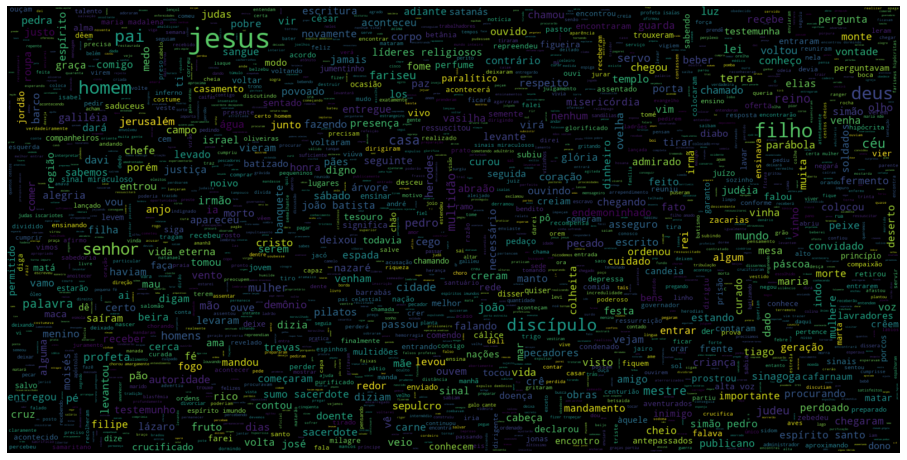

In [179]:
#Exploratory Analysis
# Import the wordcloud library

import time
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS


#Concatenar as palavras
data_words = []
data_words = " ".join(list(data_clean['text'].values)) #tutorial 1 

%time wordcloud= WordCloud(stopwords = my_stopwords, background_color="black", \
                     contour_width=3, contour_color="steelblue", \
                     max_words= 5700, \
                     random_state=42, \
                     width=1600, \
                     height=800,max_font_size=50).generate(data_words) # Criar uma WordCloud # lower max_font_size

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16, 15/1.6180)) #plt.figure(2, figsize=(16,6)) # figsize(15, 15/1.6180)
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");
#wordcloud.to_file("WorldCloud_lda_gospels.png") #Salva quando tiver certeza que as imagens estão certas. 


#Gerar a WordCloud
 #for index, doc in enumerate(data_clean.columns):


# Visualizar as WorldCloud
# Mostrar a imagem final 
#import matplotlib.pyplot as plt

#plt.title("Nuvem de palavras dos Evangelhos", fontsize=40, color="red")
#fig, ax=plt.subplots(figsize=(16,6))
#ax.imshow(wordcloud, interpolation="bilinear")
#ax.set_axis_off()
#wordcloud.to_image();
#wordcloud.to_file("WorldCloud_lda_gospels.png") #Salva quando tiver certeza que as imagens estão certas. 

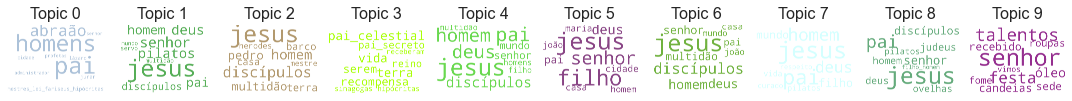

In [214]:
# Cria wordclouds
import time
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
%matplotlib inline

cols = [color for name, color in mcolors.XKCD_COLORS.items()]
cloud = WordCloud(stopwords=my_stopwords, 
        background_color='white', 
        width=2500, 
        height=1800, 
        max_words=20, 
        colormap='tab10', 
        color_func=lambda *args, **kwargs: cols[i],
        prefer_horizontal=1.0)
topics = lda_model_2.show_topics(formatted=False)

fig, axes = plt.subplots(1, 10, figsize=(15, 15/1.6180), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=600)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')

plt.subplots_adjust(wspace=1, hspace=0)
plt.axis('off')
plt.margins(x=0, y=1)
plt.tight_layout()
plt.show()

In [190]:
from time import time
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation


In [200]:
n_samples = 91
n_features = 5700
n_components = 
n_top_words = 30

In [192]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()


In [228]:
# Load the 20 newsgroups dataset and vectorize it. We use a few heuristics
# to filer out useless terms early on: the posts are stripped of headers,
# footers and quoted replies, and common English words, words occurring in
# only one document or in at least 95% of the documents are removed.
import time
import pickle

print("Loading dataset...")

data_samples = data_clean['tokens']
print("done in %0.3fs.")


Loading dataset...
done in %0.3fs.


In [229]:
# Use tf-idf features for NMF.
from time import time
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=n_features, stop_words=my_stopwords)

#t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print(tf)

Extracting tf-idf features for NMF...


NameError: name 'tf_vectorizer' is not defined

In [221]:
# Fit the NMF model
from time import time
print("Fitting the NMF model (Frobenius norm) with tf-idf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
#t0 = time()
nmf = NMF(n_components=n_components, random_state=1,alpha=.1, l1_ratio=.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in NMF model (Frobenius norm):")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)

Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=200000 and n_features=5700...


NameError: name 'tfidf' is not defined

In [222]:
# Fit the NMF model
from time import time
print("Fitting the NMF model (Frobenius norm) with tf-idf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
#t0 = time()
nmf = NMF(n_components=n_components, random_state=1, alpha=.1, l1_ratio=.5).fit(tfidf)
#print("done in %0.3fs." % (time() - t0))

print("\nTopics in NMF model (Frobenius norm):")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)


Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=200000 and n_features=5700...


NameError: name 'tfidf' is not defined

In [223]:
# Fit the NMF model
print("Fitting the NMF model (generalized Kullback-Leibler divergence) with "
      "tf-idf features, n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
#t0 = time()
nmf = NMF(n_components=n_components, random_state=1,
          beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha=.1,
          l1_ratio=.5).fit(tfidf)
#print("done in %0.3fs." % (time() - t0))

Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=200000 and n_features=5700...


NameError: name 'tfidf' is not defined

In [224]:
print("\nTopics in NMF model (generalized Kullback-Leibler divergence):")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)



Topics in NMF model (generalized Kullback-Leibler divergence):


NotFittedError: Vocabulary not fitted or provided

In [225]:
print("Fitting LDA models with tf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

Fitting LDA models with tf features, n_samples=200000 and n_features=5700...


In [226]:
t0 = time()
lda.fit(tf)
print("done in %0.3fs." % (time() - t0))

ValueError: Expected 2D array, got scalar array instead:
array=TfidfVectorizer().
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [227]:
print("\nTopics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)


Topics in LDA model:


NameError: name 'tf_vectorizer' is not defined